In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [3]:
from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *

###############################################
# Construct the inital MathematicalProgram
###############################################
num_trajectories = 1
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      ic_list=None,
                      warm_start=True)


###############################################
# Add a neural network!
###############################################
# kNetConstructor = lambda: FC(2)
kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

In [4]:
# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(vis_ic_list=None)

 1

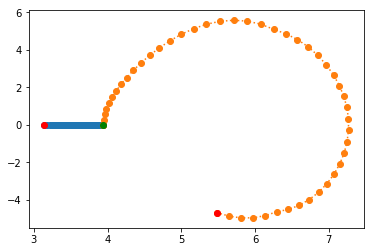

 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17SolutionResult.kSolutionFound


In [5]:
result = mto.Solve()
print(result)

In [6]:
ti = 0    
mto.print_pi_divergence(ti)

u_val-Pi(x_val)= diff
(-4.73)-(-4.83)=  0.10
(-4.05)-(-3.95)= -0.10
(-2.58)-(-2.67)=  0.09
(-1.43)-(-1.53)=  0.10
(-0.60)-(-0.70)=  0.10
(-0.10)-(-0.20)=  0.10
( 0.11)-( 0.03)=  0.08
( 0.04)-( 0.08)= -0.04
( 0.01)-( 0.09)= -0.09
(-0.01)-( 0.09)= -0.10
(-0.00)-( 0.10)= -0.10
(-0.00)-( 0.10)= -0.10
(-0.00)-( 0.10)= -0.10
( 0.00)-( 0.10)= -0.10
( 0.00)-( 0.10)= -0.10


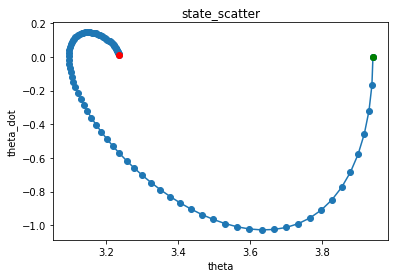

In [11]:
ti = 0
mto.plot_policy("state_scatter", ti)

In [7]:
ti = 0
ani = mto.render_policy(ti)
from IPython.display import HTML
HTML(ani.to_html5_video())

/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


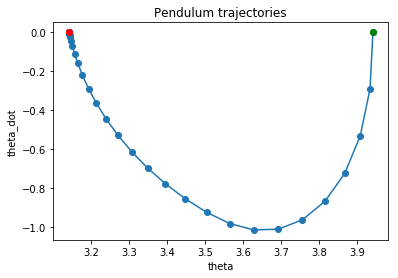

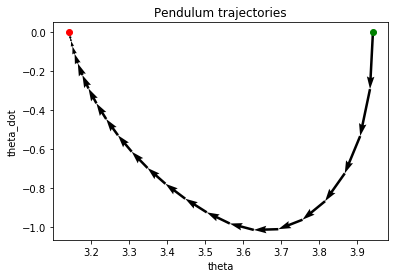

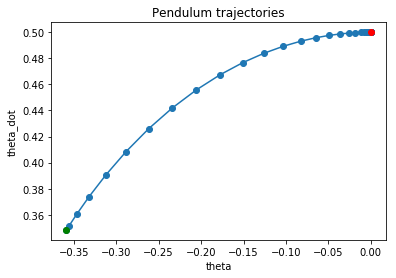

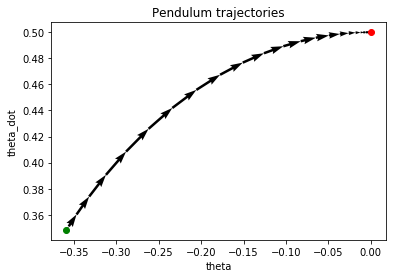

In [8]:
mto.plot_all_trajectories("state_scatter")
mto.plot_all_trajectories("state_quiver")
mto.plot_all_trajectories("tip_scatter")
mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

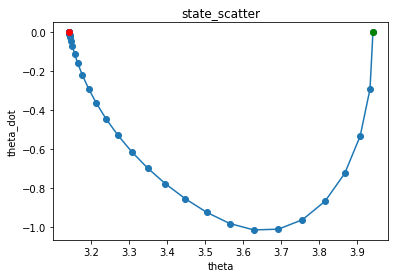

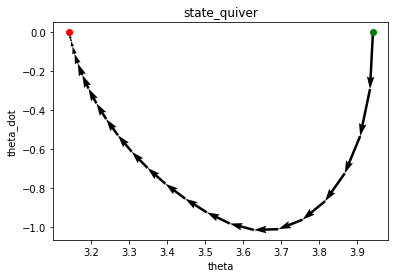

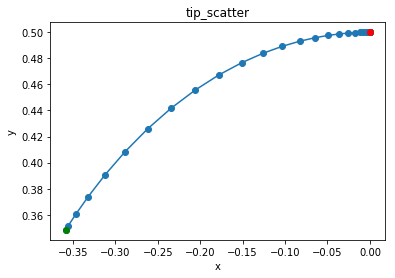

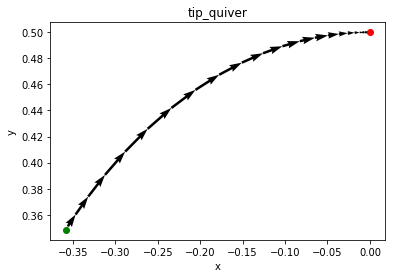

In [9]:
###### plt.figure()
# for ti in range(num_trajectories):
# for ti in [0]:

ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

ani2 = mto.render_single_trajectory(ti)
HTML(ani2.to_html5_video())